In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
run pair2.py

              precision    recall  f1-score   support

           0       0.75      0.67      0.70      4909
           1       0.81      0.87      0.84      8291

   micro avg       0.79      0.79      0.79     13200
   macro avg       0.78      0.77      0.77     13200
weighted avg       0.79      0.79      0.79     13200

[[3267 1642]
 [1109 7182]]


In [18]:
clf.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=66)

In [20]:
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [21]:
predictions = model.predict(X_test)

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      4909
           1       0.81      0.86      0.84      8291

   micro avg       0.79      0.79      0.79     13200
   macro avg       0.78      0.76      0.77     13200
weighted avg       0.79      0.79      0.79     13200



In [23]:
print(confusion_matrix(y_test, predictions))

[[3256 1653]
 [1126 7165]]


In [24]:
from roc import threshold_plots, plot_roc

In [25]:
test_df = pd.read_csv('data/churn_test.csv')

condition = test_df['last_trip_date'] < '2014-06-01' 
test_df['churn'] = 1
test_df.loc[~condition, 'churn'] = 0
y = test_df['churn']
clean = DataCleaning()
test_df = clean.transform(test_df)
test_pred = model.predict(test_df)

In [26]:
print(classification_report(y, test_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72     15032
           1       0.82      0.88      0.85     24968

   micro avg       0.80      0.80      0.80     40000
   macro avg       0.79      0.78      0.79     40000
weighted avg       0.80      0.80      0.80     40000



In [27]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr_test, tpr_test, threshold = roc_curve(y_test, preds)
roc_auc_test = auc(fpr_test, tpr_test)
probs = model.predict_proba(X_train)
preds = probs[:,1]
fpr_train, tpr_train, threshold = roc_curve(y_train, preds)
roc_auc_train = auc(fpr_train, tpr_train)
# method I: plt
# import matplotlib.pyplot as plt


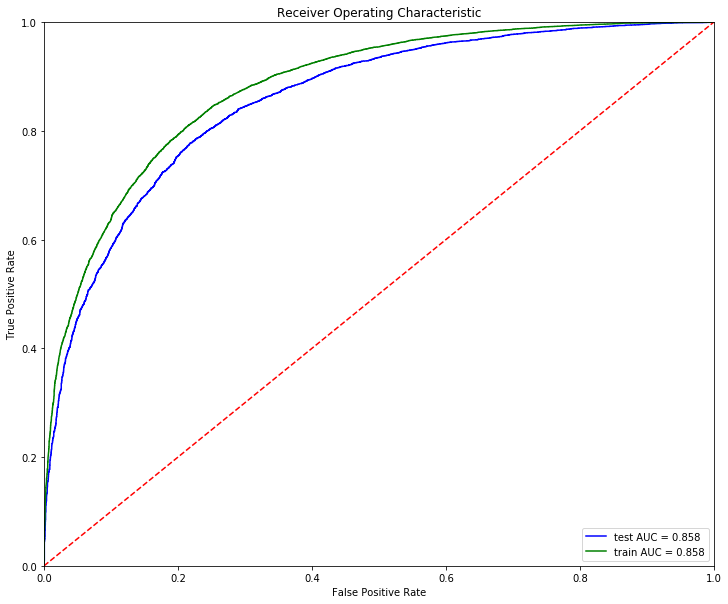

In [28]:
plt.figure(figsize=(12,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'test AUC = %0.3f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'train AUC = %0.3f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

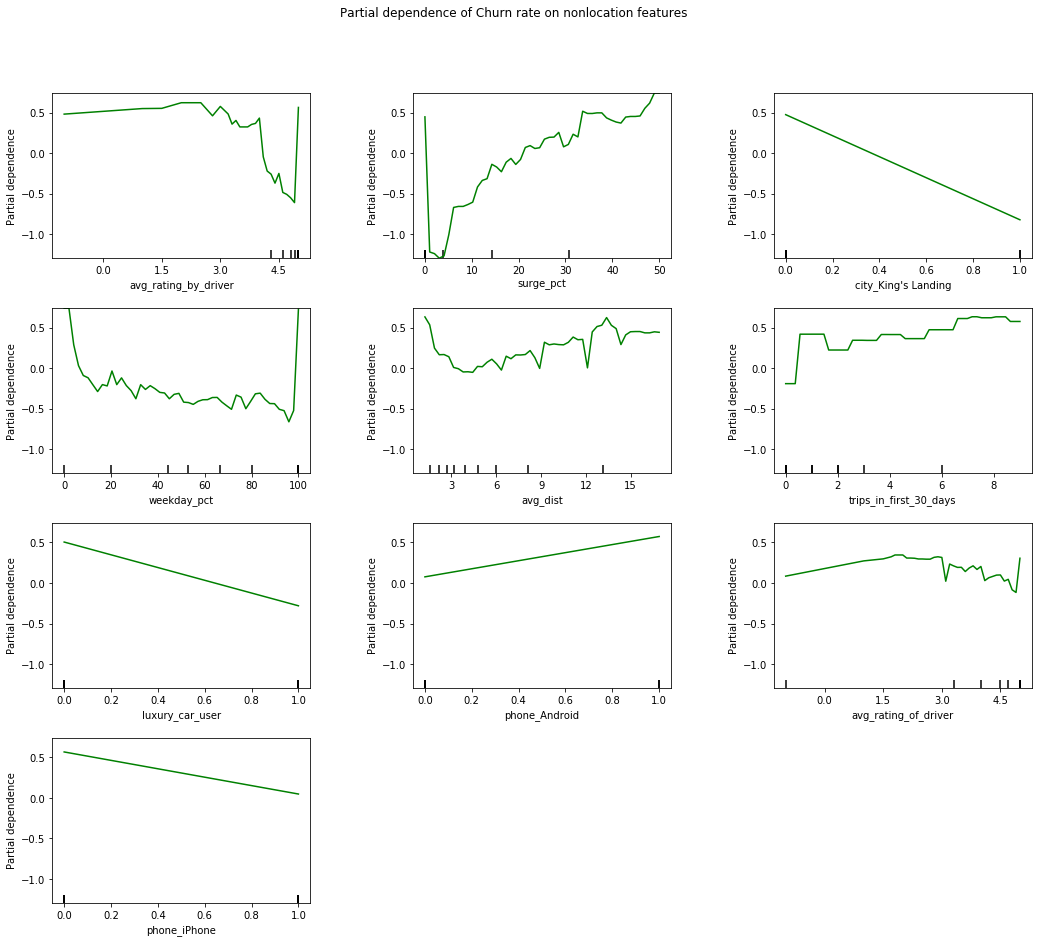

In [29]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
ind = sorted_idx
features = ind[::-1]
fig, axs = plot_partial_dependence(model, X_train, features[0:10],
                                   feature_names=X_test.columns,
                                   n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of Churn rate on nonlocation features')
fig.set_size_inches(16, 15)
plt.subplots_adjust(top=0.9) 

Analysis: key features related to customer churn are surge percentage, phone operating system, and location.

Business recommendations:  

* Consider offering more discounts during surge periods, expecially for new customers
* Develop Android app so it is on par with iOS app
* Explore reasons why riders in King's Landing tend not to churn.

To Do:

* Clean and organize code structure so it can become the basis of a pipeline
* Wrap code in functions / classes to make it more usable and flexible